In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.svm import SVC
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler




## Cleaning Dataset

In [125]:
data = pd.read_csv("final_df.csv", thousands=',', decimal='.')

In [126]:
data = data.set_index("FIPS Code")

In [127]:
data.index.name = None

In [128]:
data.dropna(axis='columns',inplace=True)

In [129]:
data

,Rep2020,Rep2016,"Less than a high school diploma, 2015-19","High school diploma only, 2015-19","Some college or associate's degree, 2015-19","Bachelor's degree or higher, 2015-19","Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19",...,CI90UB517P_2019,MEDHHINC_2019,CI90LBINC_2019,CI90UBINC_2019,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
1001,1,1,4291,12551,10596,9929,11.5,33.6,28.4,26.6,...,19.4,58233,52517,63949,26172,25458,714,2.7,58233,112.5
1003,1,1,13893,41797,47274,48148,9.2,27.7,31.3,31.9,...,17.2,59871,54593,65149,97328,94675,2653,2.7,59871,115.6
1005,1,1,4812,6396,4676,2080,26.8,35.6,26.0,11.6,...,49.0,35972,31822,40122,8537,8213,324,3.8,35972,69.5
1007,1,1,3386,7256,3848,1678,20.9,44.9,23.8,10.4,...,32.7,47918,42291,53545,8685,8419,266,3.1,47918,92.6
1009,1,1,7763,13299,13519,5210,19.5,33.4,34.0,13.1,...,25.8,52902,46777,59027,25331,24655,676,2.7,52902,102.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,1,1,2017,9239,10415,6291,7.2,33.0,37.2,22.5,...,11.1,80639,73437,87841,21274,20446,828,3.9,80639,121.9
56039,0,0,834,2577,4037,9875,4.8,14.9,23.3,57.0,...,6.7,98837,86531,111143,15575,15151,424,2.7,98837,149.4
56041,1,1,941,5383,4562,2078,7.3,41.5,35.2,16.0,...,11.1,70756,63191,78321,9035,8682,353,3.9,70756,107.0
56043,1,1,568,1650,2031,1297,10.2,29.8,36.6,23.4,...,17.4,55122,50050,60194,3941,3786,155,3.9,55122,83.3


In [130]:
X = data.drop(['Rep2020'], axis = 1)
Y = data["Rep2020"]

In [131]:
x_in, x_out, y_in, y_out = train_test_split(X, Y, test_size=0.25)

In [132]:
sc = StandardScaler()
x_in = sc.fit_transform(x_in)
x_out = sc.transform(x_out)

In [133]:
lda = LDA(n_components=1)
x_in = lda.fit_transform(x_in, y_in)
x_out = lda.transform(x_out)

In [134]:
target_names =  ["Rep Lose","Rep Win"]

In [135]:
grid={ 'C': [0.001,0.01,0.1,1,10,100,1000], "penalty":["l2"], "max_iter":[4000]}
logist=LogisticRegression()
logist_cv=GridSearchCV(logist,grid,cv=5)
logist_cv.fit(x_in,y_in)

print("tuned hpyerparameters :(best parameters) ",logist_cv.best_params_)
print("accuracy :",logist_cv.best_score_)
y_logit_pred = logist_cv.predict(x_out)
print(classification_report(y_out, y_logit_pred, target_names=target_names))

tuned hpyerparameters :(best parameters)  {'C': 1, 'max_iter': 4000, 'penalty': 'l2'}
accuracy : 0.97300181047872
              precision    recall  f1-score   support

    Rep Lose       0.98      0.92      0.95       139
     Rep Win       0.98      1.00      0.99       639

    accuracy                           0.98       778
   macro avg       0.98      0.96      0.97       778
weighted avg       0.98      0.98      0.98       778



In [136]:
grid={ 'n_neighbors': [1,3,7,9,11,13,15], "weights":["uniform","distance"], "metric":["euclidean","manhattan"]}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,grid,cv=5)
knn_cv.fit(x_in,y_in)

print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)
y_KNN_pred = knn_cv.predict(x_out)
print(classification_report(y_out, y_KNN_pred, target_names=target_names))

tuned hpyerparameters :(best parameters)  {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
accuracy : 0.9717160948801131
              precision    recall  f1-score   support

    Rep Lose       0.94      0.93      0.93       139
     Rep Win       0.98      0.99      0.99       639

    accuracy                           0.98       778
   macro avg       0.96      0.96      0.96       778
weighted avg       0.98      0.98      0.98       778



In [137]:
grid = {"criterion" : ["gini","entropy"] , "max_depth":[3,5,7,9,11] , "min_samples_split":[2,4,6,8,10] , "min_samples_leaf":[2,4,6,8,10]}
dt = tree.DecisionTreeClassifier()
dt_cv = GridSearchCV(dt,grid,cv=5)
dt_cv.fit(x_in,y_in)

print("tuned hpyerparameters :(best parameters) ",dt_cv.best_params_)
print("accuracy :",dt_cv.best_score_)
y_DT_pred = dt_cv.predict(x_out)
print(classification_report(y_out, y_DT_pred, target_names=target_names))

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
accuracy : 0.97300181047872
              precision    recall  f1-score   support

    Rep Lose       0.97      0.91      0.94       139
     Rep Win       0.98      0.99      0.99       639

    accuracy                           0.98       778
   macro avg       0.98      0.95      0.96       778
weighted avg       0.98      0.98      0.98       778



## Predict All Counties with the Best Model

using LDA to reduce the dimentionality of the dataset

In [138]:
X_all = lda.fit_transform(X, Y)

In [139]:
predict_all = logist_cv.predict(X_all)
print(classification_report(Y, predict_all, target_names=target_names))

              precision    recall  f1-score   support

    Rep Lose       0.97      0.88      0.92       537
     Rep Win       0.98      0.99      0.98      2574

    accuracy                           0.97      3111
   macro avg       0.97      0.94      0.95      3111
weighted avg       0.97      0.97      0.97      3111



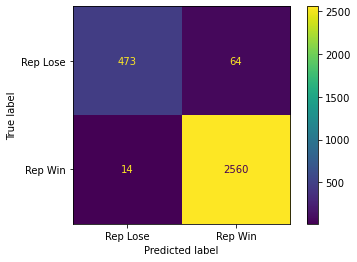

In [140]:
result_matrix = metrics.confusion_matrix(Y, predict_all)
disp1 = ConfusionMatrixDisplay(confusion_matrix=result_matrix, display_labels=target_names)
disp1.plot()

## Can We Use the Same Counties Data to Predict Which are the Swing Counties?

Assign col with rep2020 =/= rep2016

In [198]:
vote_result = data[["Rep2020","Rep2016"]]

In [199]:
vote_result

,Rep2020,Rep2016
1001,1,1
1003,1,1
1005,1,1
1007,1,1
1009,1,1
...,...,...
56037,1,1
56039,0,0
56041,1,1
56043,1,1


In [200]:
def swingvotes(row):
    if row['Rep2020'] != row['Rep2016']:
        val = 1
    else:
        val = 0
    return val


vote_result['Swingvote'] = vote_result.apply(swingvotes, axis=1)

<ipython-input-200-54f341a0e352>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vote_result['Swingvote'] = vote_result.apply(swingvotes, axis=1)


In [201]:
vote_result.groupby('Swingvote').count()

,Rep2020,Rep2016
Swingvote,,
0,3032,3032
1,79,79


In [213]:
swing2016 = pd.read_csv("swing2016.csv", index_col= "fips")

In [214]:
dataswing = pd.merge(data, swing2016, left_index=True, right_index=True)

In [215]:
Y_change = vote_result['Swingvote']
X_change = dataswing.drop(["Rep2016","Rep2020"], axis = 1) 

In [216]:
x_change_in, x_change_out, y_change_in, y_change_out = train_test_split(X_change, Y_change, test_size=0.3)

In [217]:
sc = StandardScaler()
x_change_in = sc.fit_transform(x_change_in)
x_change_out = sc.transform(x_change_out)
lda = LDA(n_components=1)
x_change_in = lda.fit_transform(x_change_in,y_change_in)
x_change_out = lda.transform(x_change_out)

In [218]:
grid={ 'C': [0.001,0.01,0.1,1,10,100,1000], "penalty":["l2"], "max_iter":[4000]}
change_logist_cv=GridSearchCV(logist,grid,cv=10)
change_logist_cv.fit(x_change_in,y_change_in)
print("tuned hpyerparameters :(best parameters) ",change_logist_cv.best_params_)
print("accuracy :",change_logist_cv.best_score_)
y_change_logit_pred = change_logist_cv.predict(x_change_out)
print(classification_report(y_change_out, y_change_logit_pred, target_names= ["No Change", "Vote Change"]))

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'max_iter': 4000, 'penalty': 'l2'}
accuracy : 0.9751997632435634
              precision    recall  f1-score   support

   No Change       0.98      1.00      0.99       911
 Vote Change       0.00      0.00      0.00        23

    accuracy                           0.97       934
   macro avg       0.49      0.50      0.49       934
weighted avg       0.95      0.97      0.96       934



In [219]:
grid={ 'n_neighbors': [1,3,7,9,11,13,15], "weights":["uniform","distance"], "metric":["euclidean","manhattan"]}
change_knn_cv = GridSearchCV(knn,grid,cv=10)
change_knn_cv.fit(x_change_in,y_change_in)

print("tuned hpyerparameters :(best parameters) ",change_knn_cv.best_params_)
print("accuracy :",change_knn_cv.best_score_)
y_change_KNN_pred = change_knn_cv.predict(x_change_out)
print(classification_report(y_change_out, y_change_KNN_pred, target_names= ["No Change", "Vote Change"]))

tuned hpyerparameters :(best parameters)  {'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'uniform'}
accuracy : 0.9742802181541454
              precision    recall  f1-score   support

   No Change       0.98      1.00      0.99       911
 Vote Change       0.00      0.00      0.00        23

    accuracy                           0.98       934
   macro avg       0.49      0.50      0.49       934
weighted avg       0.95      0.98      0.96       934



C:\Users\Zack\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Zack\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Zack\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [220]:
grid = {"criterion" : ["gini","entropy"] , "max_depth":[3,5,7,9,11] , "min_samples_split":[2,4,6,8,10] , "min_samples_leaf":[2,4,6,8,10]}
change_dt_cv = GridSearchCV(dt,grid,cv=10)
change_dt_cv.fit(x_change_in,y_change_in)

print("tuned hpyerparameters :(best parameters) ",change_dt_cv.best_params_)
print("accuracy :",change_dt_cv.best_score_)
y_change_DT_pred = change_dt_cv.predict(x_change_out)
print(classification_report(y_change_out, y_change_DT_pred, target_names= ["No Change", "Vote Change"]))

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
accuracy : 0.9765822517228259
              precision    recall  f1-score   support

   No Change       0.98      0.99      0.98       911
 Vote Change       0.00      0.00      0.00        23

    accuracy                           0.97       934
   macro avg       0.49      0.50      0.49       934
weighted avg       0.95      0.97      0.96       934



In [221]:
X_change_all = lda.fit_transform(X_change, Y_change)
predict_change_all = change_dt_cv.predict(X_change_all)
print(classification_report(Y_change, predict_change_all, target_names= ["No Change", "Vote Change"]))

              precision    recall  f1-score   support

   No Change       0.98      1.00      0.99      3032
 Vote Change       0.22      0.05      0.08        79

    accuracy                           0.97      3111
   macro avg       0.60      0.52      0.53      3111
weighted avg       0.96      0.97      0.96      3111



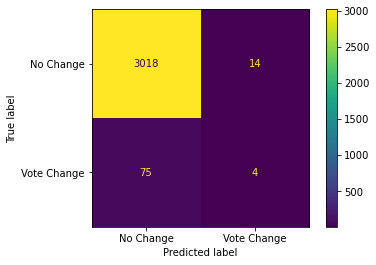

In [222]:
change_matrix = metrics.confusion_matrix(Y_change, predict_change_all)
disp2 = ConfusionMatrixDisplay(confusion_matrix=change_matrix, display_labels=["No Change", "Vote Change"])
disp2.plot() 